In [1]:
import pandas as pd
import numpy as np
import uproot
import matplotlib
from matplotlib import pyplot as plt
from __future__ import division
from tqdm import tqdm

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
input_bkg = [#'trees/MaxDigis_tree_Neutrino_gun.root',
             'trees/MaxDigis_tree_Data.root',
            ]
first_sig = ['trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-25_CTau-15000mm_TuneCP5_14TeV_pythia8.root']
input_sig = ['trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-25_CTau-1500mm_TuneCP5_14TeV_pythia8.root',
             #'trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-1000_MFF-450_CTau-100000mm_TuneCP5_14TeV_pythia8.root',
             #'trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-1000_MFF-450_CTau-10000mm_TuneCP5_14TeV_pythia8.root',
             'trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-12_CTau-9000mm_TuneCP5_14TeV_pythia8.root',
             'trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-12_CTau-900mm_TuneCP5_14TeV_pythia8.root',
             'trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-50_CTau-30000mm_TuneCP5_14TeV_pythia8.root',
             'trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-50_CTau-3000mm_TuneCP5_14TeV_pythia8.root',
            ]
comp_treename = 'comparator'
wire_treename = 'wire'

comp_vars = [ 'Ev_max_nComp_ME11','Ev_max_nComp_ME12','Ev_max_nComp_ME13','Ev_max_nComp_ME21','Ev_max_nComp_ME22',
             'Ev_max_nComp_ME31','Ev_max_nComp_ME32','Ev_max_nComp_ME41','Ev_max_nComp_ME42']
wire_vars = [ 'Ev_max_nWire_ME11','Ev_max_nWire_ME12','Ev_max_nWire_ME13','Ev_max_nWire_ME21','Ev_max_nWire_ME22',
             'Ev_max_nWire_ME31','Ev_max_nWire_ME32','Ev_max_nWire_ME41','Ev_max_nWire_ME42']

#all_vars = [ 'Ev_nComp_ME11','Ev_nComp_ME12']

comp_vars = list(set(comp_vars))
wire_vars = list(set(wire_vars))

arrs_comp_sig = [None]*(len(input_sig)+1)
arrs_wire_sig = [None]*(len(input_sig)+1)

print "Opening input files"

print "Opening file: ", first_sig
arrs_comp_sig[0] = uproot.open(first_sig[0])[comp_treename]
arrs_wire_sig[0] = uproot.open(first_sig[0])[wire_treename]
comp_sig = arrs_comp_sig[0].pandas.df(comp_vars)
wire_sig = arrs_wire_sig[0].pandas.df(wire_vars)

j=1
for i in (input_sig):
    print "Opening file: ", i
    arrs_comp_sig[j] = uproot.open(i)[comp_treename]
    arrs_wire_sig[j] = uproot.open(i)[wire_treename]
    temp_comp_sig = arrs_comp_sig[j].pandas.df(comp_vars)
    temp_wire_sig = arrs_wire_sig[j].pandas.df(wire_vars)
    comp_sig = comp_sig.append(temp_comp_sig)
    wire_sig = wire_sig.append(temp_wire_sig)
    j=j+1


print "Opening file: ", input_bkg
arrs_comp_bkg = uproot.open(input_bkg[0])[comp_treename]
arrs_wire_bkg = uproot.open(input_bkg[0])[wire_treename]
comp_bkg = arrs_comp_bkg.pandas.df(comp_vars)
wire_bkg = arrs_wire_bkg.pandas.df(wire_vars)

Opening input files
Opening file:  ['trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-25_CTau-15000mm_TuneCP5_14TeV_pythia8.root']
Opening file:  trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-25_CTau-1500mm_TuneCP5_14TeV_pythia8.root
Opening file:  trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-12_CTau-9000mm_TuneCP5_14TeV_pythia8.root
Opening file:  trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-12_CTau-900mm_TuneCP5_14TeV_pythia8.root
Opening file:  trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-50_CTau-30000mm_TuneCP5_14TeV_pythia8.root
Opening file:  trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-50_CTau-3000mm_TuneCP5_14TeV_pythia8.root
Opening file:  ['trees/MaxDigis_tree_Data.root']


# Single Limit

In [3]:
# efficiency=[0]
# comp_sig_tot = len(comp_sig)
# rate=[0]
# comp_bkg_tot = len(comp_bkg)

# min_=30
# max_=60
# it=5

# for comp11 in tqdm(xrange(min_,max_,it)):
#   for comp12 in xrange(min_,max_,it):
#     for comp13 in xrange(min_,max_,it):
#       for comp21 in xrange(min_,max_,it):
#         for comp22 in xrange(min_,max_,it):
#           for comp31 in xrange(min_,max_,it):
#             for comp32 in xrange(min_,max_,it):
#               for comp41 in xrange(min_,max_,it):
#                 for comp42 in xrange(min_,max_,it):

#                   efficiency.append(len(comp_sig[(comp_sig['Ev_max_nComp_ME11'] > comp11) | (comp_sig['Ev_max_nComp_ME12'] > comp12) | (comp_sig['Ev_max_nComp_ME13'] > comp13) |
#                                                  (comp_sig['Ev_max_nComp_ME21'] > comp21) | (comp_sig['Ev_max_nComp_ME22'] > comp22) |
#                                                  (comp_sig['Ev_max_nComp_ME31'] > comp31) | (comp_sig['Ev_max_nComp_ME32'] > comp32) |
#                                                  (comp_sig['Ev_max_nComp_ME41'] > comp41) | (comp_sig['Ev_max_nComp_ME41'] > comp42)])/comp_sig_tot*100)
                
#                   rate.append(len(comp_bkg[(comp_bkg['Ev_max_nComp_ME11'] > comp11) | (comp_bkg['Ev_max_nComp_ME12'] > comp12) | (comp_bkg['Ev_max_nComp_ME13'] > comp13) |
#                                            (comp_bkg['Ev_max_nComp_ME21'] > comp21) | (comp_bkg['Ev_max_nComp_ME22'] > comp22) |
#                                            (comp_bkg['Ev_max_nComp_ME31'] > comp31) | (comp_bkg['Ev_max_nComp_ME32'] > comp32) |
#                                            (comp_bkg['Ev_max_nComp_ME41'] > comp41) | (comp_bkg['Ev_max_nComp_ME41'] > comp42)])/comp_bkg_tot*30*1000)

In [4]:
# comp_efficiency=[0]
# comp_sig_tot = len(comp_sig)
# comp_rate=[0]
# comp_bkg_tot = len(comp_bkg)
# comp_limits=[0]

# min_=0
# max_=120
# it_=1

# for limit in tqdm(xrange(min_,max_,it_)):
#     comp_efficiency.append(len(comp_sig[#(comp_sig['Ev_max_nComp_ME11'] > limit) | (comp_sig['Ev_max_nComp_ME12'] > limit) | (comp_sig['Ev_max_nComp_ME13'] > limit) |
#                                         (comp_sig['Ev_max_nComp_ME21'] > limit) | (comp_sig['Ev_max_nComp_ME22'] > limit) |
#                                         (comp_sig['Ev_max_nComp_ME31'] > limit) | (comp_sig['Ev_max_nComp_ME32'] > limit) |
#                                         (comp_sig['Ev_max_nComp_ME41'] > limit) | (comp_sig['Ev_max_nComp_ME41'] > limit)])/comp_sig_tot*100)
    
#     comp_rate.append(len(comp_bkg[#(comp_bkg['Ev_max_nComp_ME11'] > limit) | (comp_bkg['Ev_max_nComp_ME12'] > limit) | (comp_bkg['Ev_max_nComp_ME13'] > limit) |
#                                   (comp_bkg['Ev_max_nComp_ME21'] > limit) | (comp_bkg['Ev_max_nComp_ME22'] > limit) |
#                                   (comp_bkg['Ev_max_nComp_ME31'] > limit) | (comp_bkg['Ev_max_nComp_ME32'] > limit) |
#                                   (comp_bkg['Ev_max_nComp_ME41'] > limit) | (comp_bkg['Ev_max_nComp_ME41'] > limit)])/comp_bkg_tot*30*1000)
    
#     comp_limits.append(limit)

In [5]:
# plt.plot(comp_rate,comp_efficiency,'bo')
# plt.xlim(0,1)
# plt.ylim(0,40)
# plt.xlabel('Rate (kHz)')
# plt.ylabel('Efficiency (%)')
# plt.title('Comparator ROC Curve')

In [6]:
# for i in range(len(comp_rate)):
#     if comp_rate[i] > 0.4 and comp_rate[i] < 1:
#         print 'rate =', comp_rate[i], 'kHz and efficiency =', comp_efficiency[i], '% for threshold >', comp_limits[i]

In [7]:
# wire_efficiency=[0]
# wire_sig_tot = len(wire_sig)
# wire_rate=[0]
# wire_bkg_tot = len(wire_bkg)
# wire_limits=[0]

# min_=0
# max_=120
# it_=1

# for limit in tqdm(xrange(min_,max_,it_)):
#     wire_efficiency.append(len(wire_sig[#(wire_sig['Ev_max_nWire_ME11'] > limit) | (wire_sig['Ev_max_nWire_ME12'] > limit) | (wire_sig['Ev_max_nWire_ME13'] > limit) |
#                                         (wire_sig['Ev_max_nWire_ME21'] > limit) | (wire_sig['Ev_max_nWire_ME22'] > limit) |
#                                         (wire_sig['Ev_max_nWire_ME31'] > limit) | (wire_sig['Ev_max_nWire_ME32'] > limit) |
#                                         (wire_sig['Ev_max_nWire_ME41'] > limit) | (wire_sig['Ev_max_nWire_ME41'] > limit)])/wire_sig_tot*100)
    
#     wire_rate.append(len(wire_bkg[#(wire_bkg['Ev_max_nWire_ME11'] > limit) | (wire_bkg['Ev_max_nWire_ME12'] > limit) | (wire_bkg['Ev_max_nWire_ME13'] > limit) |
#                                   (wire_bkg['Ev_max_nWire_ME21'] > limit) | (wire_bkg['Ev_max_nWire_ME22'] > limit) |
#                                   (wire_bkg['Ev_max_nWire_ME31'] > limit) | (wire_bkg['Ev_max_nWire_ME32'] > limit) |
#                                   (wire_bkg['Ev_max_nWire_ME41'] > limit) | (wire_bkg['Ev_max_nWire_ME41'] > limit)])/wire_bkg_tot*30*1000)
    
#     wire_limits.append(limit)

In [8]:
# plt.plot(wire_rate,wire_efficiency,'bo')
# plt.xlim(0,1)
# plt.ylim(0,40)
# plt.xlabel('Rate (kHz)')
# plt.ylabel('Efficiency (%)')
# plt.title('Wire ROC Curve')

In [9]:
# for i in range(len(wire_rate)):
#     if wire_rate[i] > 0.4 and wire_rate[i] < 1.0:
#         print 'rate =', wire_rate[i], 'kHz and efficiency =', wire_efficiency[i], '% for threshold >', wire_limits[i]

# Comparator

100%|██████████| 130/130 [00:01<00:00, 66.97it/s]


rate = 0.106365182615 kHz and efficiency = 0.145991161616 % for threshold > 82
rate = 0.0966956205586 kHz and efficiency = 0.145991161616 % for threshold > 83
rate = 0.0966956205586 kHz and efficiency = 0.122316919192 % for threshold > 84
rate = 0.0773564964469 kHz and efficiency = 0.106534090909 % for threshold > 85
rate = 0.0773564964469 kHz and efficiency = 0.0986426767677 % for threshold > 86
rate = 0.0773564964469 kHz and efficiency = 0.0789141414141 % for threshold > 87
rate = 0.0676869343911 kHz and efficiency = 0.067077020202 % for threshold > 88
rate = 0.0676869343911 kHz and efficiency = 0.0631313131313 % for threshold > 89
rate = 0.0676869343911 kHz and efficiency = 0.0591856060606 % for threshold > 90
rate = 0.0676869343911 kHz and efficiency = 0.0552398989899 % for threshold > 91
rate = 0.0580173723352 kHz and efficiency = 0.0552398989899 % for threshold > 92
rate = 0.0483478102793 kHz and efficiency = 0.0473484848485 % for threshold > 93
rate = 0.0386782482235 kHz and eff

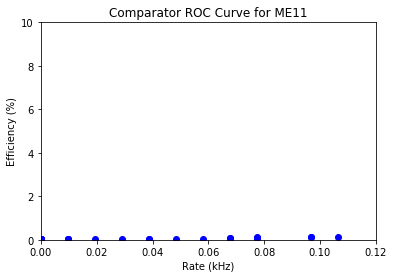

In [10]:
comp_efficiency=[0]
comp_sig_tot = len(comp_sig)
comp_rate=[0]
comp_bkg_tot = len(comp_bkg)
comp_limits=[0]

min_=0
max_=130
it_=1

for limit in tqdm(xrange(min_,max_,it_)):
    comp_efficiency.append(len(comp_sig[(comp_sig['Ev_max_nComp_ME11'] > limit)])/comp_sig_tot*100)
    
    comp_rate.append(len(comp_bkg[(comp_bkg['Ev_max_nComp_ME11'] > limit)])/comp_bkg_tot*30*1000)
    
    comp_limits.append(limit)
    
plt.plot(comp_rate,comp_efficiency,'bo')
plt.xlim(0,.12)
plt.ylim(0,10)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Comparator ROC Curve for ME11')

for i in range(len(comp_rate)):
    if comp_rate[i] > 0.02 and comp_rate[i] < 0.12:
        print 'rate =', comp_rate[i], 'kHz and efficiency =', comp_efficiency[i], '% for threshold >', comp_limits[i]

100%|██████████| 130/130 [00:00<00:00, 180.56it/s]


rate = 0.193391241117 kHz and efficiency = 4.09169823232 % for threshold > 56
rate = 0.16438255495 kHz and efficiency = 3.95754419192 % for threshold > 57
rate = 0.154712992894 kHz and efficiency = 3.81549873737 % for threshold > 58
rate = 0.135373868782 kHz and efficiency = 3.70501893939 % for threshold > 59
rate = 0.125704306726 kHz and efficiency = 3.56691919192 % for threshold > 60
rate = 0.106365182615 kHz and efficiency = 3.45249368687 % for threshold > 61
rate = 0.0966956205586 kHz and efficiency = 3.31044823232 % for threshold > 62
rate = 0.0870260585028 kHz and efficiency = 3.16445707071 % for threshold > 63
rate = 0.0773564964469 kHz and efficiency = 3.01846590909 % for threshold > 64
rate = 0.0676869343911 kHz and efficiency = 2.88825757576 % for threshold > 65
rate = 0.0676869343911 kHz and efficiency = 2.78172348485 % for threshold > 66
rate = 0.0676869343911 kHz and efficiency = 2.65151515152 % for threshold > 67
rate = 0.0676869343911 kHz and efficiency = 2.51341540404 %

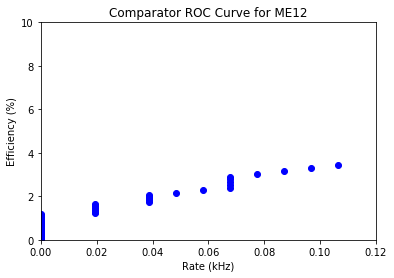

In [11]:
comp_efficiency=[0]
comp_sig_tot = len(comp_sig)
comp_rate=[0]
comp_bkg_tot = len(comp_bkg)
comp_limits=[0]

min_=0
max_=130
it_=1

for limit in tqdm(xrange(min_,max_,it_)):
    comp_efficiency.append(len(comp_sig[(comp_sig['Ev_max_nComp_ME12'] > limit)])/comp_sig_tot*100)
    
    comp_rate.append(len(comp_bkg[(comp_bkg['Ev_max_nComp_ME12'] > limit)])/comp_bkg_tot*30*1000)
    
    comp_limits.append(limit)
    
plt.plot(comp_rate,comp_efficiency,'bo')
plt.xlim(0,.12)
plt.ylim(0,10)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Comparator ROC Curve for ME12')

for i in range(len(comp_rate)):
    if comp_rate[i] > 0.02 and comp_rate[i] < 0.2:
        print 'rate =', comp_rate[i], 'kHz and efficiency =', comp_efficiency[i], '% for threshold >', comp_limits[i]

100%|██████████| 130/130 [00:00<00:00, 248.11it/s]


rate = 0.11603474467 kHz and efficiency = 3.61821338384 % for threshold > 25
rate = 0.106365182615 kHz and efficiency = 3.44065656566 % for threshold > 26
rate = 0.0870260585028 kHz and efficiency = 3.29466540404 % for threshold > 27
rate = 0.0870260585028 kHz and efficiency = 3.14472853535 % for threshold > 28
rate = 0.0483478102793 kHz and efficiency = 3.01057449495 % for threshold > 29
rate = 0.0386782482235 kHz and efficiency = 2.90009469697 % for threshold > 30
rate = 0.0386782482235 kHz and efficiency = 2.79356060606 % for threshold > 31
rate = 0.0386782482235 kHz and efficiency = 2.68702651515 % for threshold > 32
rate = 0.0386782482235 kHz and efficiency = 2.54103535354 % for threshold > 33
rate = 0.0386782482235 kHz and efficiency = 2.45028409091 % for threshold > 34
rate = 0.0386782482235 kHz and efficiency = 2.35164141414 % for threshold > 35
rate = 0.0386782482235 kHz and efficiency = 2.25299873737 % for threshold > 36
rate = 0.0386782482235 kHz and efficiency = 2.122790404

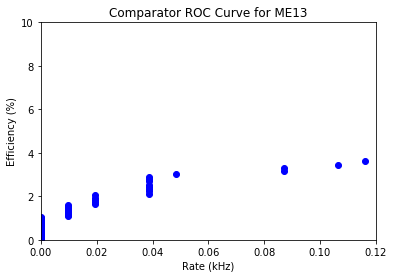

In [12]:
comp_efficiency=[0]
comp_sig_tot = len(comp_sig)
comp_rate=[0]
comp_bkg_tot = len(comp_bkg)
comp_limits=[0]

min_=0
max_=130
it_=1

for limit in tqdm(xrange(min_,max_,it_)):
    comp_efficiency.append(len(comp_sig[(comp_sig['Ev_max_nComp_ME13'] > limit)])/comp_sig_tot*100)
    
    comp_rate.append(len(comp_bkg[(comp_bkg['Ev_max_nComp_ME13'] > limit)])/comp_bkg_tot*30*1000)
    
    comp_limits.append(limit)
    
plt.plot(comp_rate,comp_efficiency,'bo')
plt.xlim(0,.12)
plt.ylim(0,10)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Comparator ROC Curve for ME13')

for i in range(len(comp_rate)):
    if comp_rate[i] > 0.02 and comp_rate[i] < 0.12:
        print 'rate =', comp_rate[i], 'kHz and efficiency =', comp_efficiency[i], '% for threshold >', comp_limits[i]

100%|██████████| 130/130 [00:01<00:00, 110.37it/s]


rate = 0.0966956205586 kHz and efficiency = 3.96938131313 % for threshold > 44
rate = 0.0870260585028 kHz and efficiency = 3.86284722222 % for threshold > 45
rate = 0.0773564964469 kHz and efficiency = 3.68134469697 % for threshold > 46
rate = 0.0773564964469 kHz and efficiency = 3.50378787879 % for threshold > 47
rate = 0.0483478102793 kHz and efficiency = 3.34990530303 % for threshold > 48
rate = 0.0386782482235 kHz and efficiency = 3.20391414141 % for threshold > 49
rate = 0.0386782482235 kHz and efficiency = 3.07370580808 % for threshold > 50
rate = 0.0386782482235 kHz and efficiency = 2.93560606061 % for threshold > 51
rate = 0.0290086861676 kHz and efficiency = 2.81328914141 % for threshold > 52
rate = 0.0290086861676 kHz and efficiency = 2.70675505051 % for threshold > 53
rate = 0.0290086861676 kHz and efficiency = 2.5726010101 % for threshold > 54
rate = 0.0290086861676 kHz and efficiency = 2.42660984848 % for threshold > 55
rate = 0.0290086861676 kHz and efficiency = 2.3042929

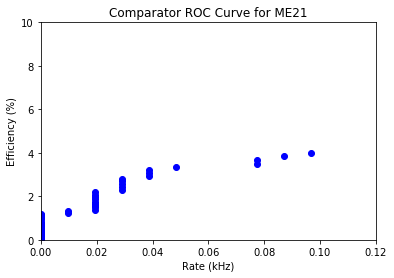

In [13]:
comp_efficiency=[0]
comp_sig_tot = len(comp_sig)
comp_rate=[0]
comp_bkg_tot = len(comp_bkg)
comp_limits=[0]

min_=0
max_=130
it_=1

for limit in tqdm(xrange(min_,max_,it_)):
    comp_efficiency.append(len(comp_sig[(comp_sig['Ev_max_nComp_ME21'] > limit)])/comp_sig_tot*100)
    
    comp_rate.append(len(comp_bkg[(comp_bkg['Ev_max_nComp_ME21'] > limit)])/comp_bkg_tot*30*1000)
    
    comp_limits.append(limit)
    
plt.plot(comp_rate,comp_efficiency,'bo')
plt.xlim(0,.12)
plt.ylim(0,10)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Comparator ROC Curve for ME21')

for i in range(len(comp_rate)):
    if comp_rate[i] > 0.02 and comp_rate[i] < 0.12:
        print 'rate =', comp_rate[i], 'kHz and efficiency =', comp_efficiency[i], '% for threshold >', comp_limits[i]

100%|██████████| 130/130 [00:00<00:00, 206.06it/s]


rate = 0.0773564964469 kHz and efficiency = 5.77256944444 % for threshold > 39
rate = 0.0676869343911 kHz and efficiency = 5.51215277778 % for threshold > 40
rate = 0.0483478102793 kHz and efficiency = 5.24779040404 % for threshold > 41
rate = 0.0386782482235 kHz and efficiency = 4.99131944444 % for threshold > 42
rate = 0.0386782482235 kHz and efficiency = 4.79797979798 % for threshold > 43
rate = 0.0386782482235 kHz and efficiency = 4.56518308081 % for threshold > 44
rate = 0.0290086861676 kHz and efficiency = 4.37973484848 % for threshold > 45


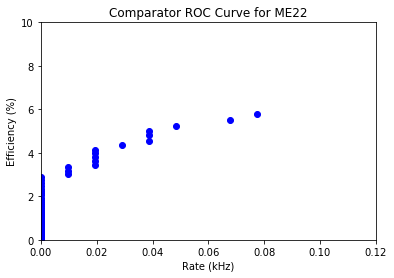

In [14]:
comp_efficiency=[0]
comp_sig_tot = len(comp_sig)
comp_rate=[0]
comp_bkg_tot = len(comp_bkg)
comp_limits=[0]

min_=0
max_=130
it_=1

for limit in tqdm(xrange(min_,max_,it_)):
    comp_efficiency.append(len(comp_sig[(comp_sig['Ev_max_nComp_ME22'] > limit)])/comp_sig_tot*100)
    
    comp_rate.append(len(comp_bkg[(comp_bkg['Ev_max_nComp_ME22'] > limit)])/comp_bkg_tot*30*1000)
    
    comp_limits.append(limit)
    
plt.plot(comp_rate,comp_efficiency,'bo')
plt.xlim(0,.12)
plt.ylim(0,10)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Comparator ROC Curve for ME22')

for i in range(len(comp_rate)):
    if comp_rate[i] > 0.02 and comp_rate[i] < 0.12:
        print 'rate =', comp_rate[i], 'kHz and efficiency =', comp_efficiency[i], '% for threshold >', comp_limits[i]

100%|██████████| 130/130 [00:01<00:00, 118.77it/s]


rate = 0.0966956205586 kHz and efficiency = 3.73658459596 % for threshold > 42
rate = 0.0870260585028 kHz and efficiency = 3.56297348485 % for threshold > 43
rate = 0.0870260585028 kHz and efficiency = 3.42487373737 % for threshold > 44
rate = 0.0773564964469 kHz and efficiency = 3.27888257576 % for threshold > 45
rate = 0.0676869343911 kHz and efficiency = 3.08554292929 % for threshold > 46
rate = 0.0483478102793 kHz and efficiency = 2.96717171717 % for threshold > 47
rate = 0.0483478102793 kHz and efficiency = 2.85669191919 % for threshold > 48
rate = 0.0290086861676 kHz and efficiency = 2.76199494949 % for threshold > 49
rate = 0.0290086861676 kHz and efficiency = 2.61205808081 % for threshold > 50


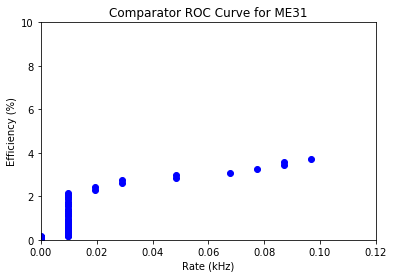

In [15]:
comp_efficiency=[0]
comp_sig_tot = len(comp_sig)
comp_rate=[0]
comp_bkg_tot = len(comp_bkg)
comp_limits=[0]

min_=0
max_=130
it_=1

for limit in tqdm(xrange(min_,max_,it_)):
    comp_efficiency.append(len(comp_sig[(comp_sig['Ev_max_nComp_ME31'] > limit)])/comp_sig_tot*100)
    
    comp_rate.append(len(comp_bkg[(comp_bkg['Ev_max_nComp_ME31'] > limit)])/comp_bkg_tot*30*1000)
    
    comp_limits.append(limit)
    
plt.plot(comp_rate,comp_efficiency,'bo')
plt.xlim(0,.12)
plt.ylim(0,10)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Comparator ROC Curve for ME31')

for i in range(len(comp_rate)):
    if comp_rate[i] > 0.02 and comp_rate[i] < 0.12:
        print 'rate =', comp_rate[i], 'kHz and efficiency =', comp_efficiency[i], '% for threshold >', comp_limits[i]

100%|██████████| 130/130 [00:00<00:00, 192.84it/s]


rate = 0.106365182615 kHz and efficiency = 5.75284090909 % for threshold > 30
rate = 0.0773564964469 kHz and efficiency = 5.46085858586 % for threshold > 31
rate = 0.0676869343911 kHz and efficiency = 5.23595328283 % for threshold > 32
rate = 0.0483478102793 kHz and efficiency = 4.9834280303 % for threshold > 33
rate = 0.0386782482235 kHz and efficiency = 4.69933712121 % for threshold > 34
rate = 0.0290086861676 kHz and efficiency = 4.47048611111 % for threshold > 35


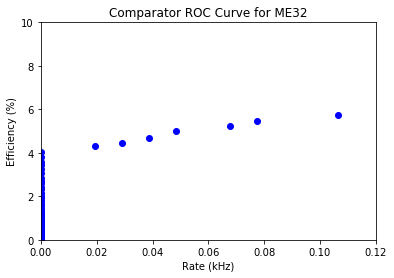

In [16]:
comp_efficiency=[0]
comp_sig_tot = len(comp_sig)
comp_rate=[0]
comp_bkg_tot = len(comp_bkg)
comp_limits=[0]

min_=0
max_=130
it_=1

for limit in tqdm(xrange(min_,max_,it_)):
    comp_efficiency.append(len(comp_sig[(comp_sig['Ev_max_nComp_ME32'] > limit)])/comp_sig_tot*100)
    
    comp_rate.append(len(comp_bkg[(comp_bkg['Ev_max_nComp_ME32'] > limit)])/comp_bkg_tot*30*1000)
    
    comp_limits.append(limit)
    
plt.plot(comp_rate,comp_efficiency,'bo')
plt.xlim(0,.12)
plt.ylim(0,10)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Comparator ROC Curve for ME32')

for i in range(len(comp_rate)):
    if comp_rate[i] > 0.02 and comp_rate[i] < 0.12:
        print 'rate =', comp_rate[i], 'kHz and efficiency =', comp_efficiency[i], '% for threshold >', comp_limits[i]

100%|██████████| 130/130 [00:00<00:00, 130.69it/s]


rate = 0.11603474467 kHz and efficiency = 5.45296717172 % for threshold > 40
rate = 0.106365182615 kHz and efficiency = 5.28724747475 % for threshold > 41
rate = 0.0773564964469 kHz and efficiency = 5.10969065657 % for threshold > 42
rate = 0.0773564964469 kHz and efficiency = 4.93213383838 % for threshold > 43
rate = 0.0773564964469 kHz and efficiency = 4.76246843434 % for threshold > 44
rate = 0.0773564964469 kHz and efficiency = 4.56123737374 % for threshold > 45
rate = 0.0773564964469 kHz and efficiency = 4.40735479798 % for threshold > 46
rate = 0.0580173723352 kHz and efficiency = 4.24558080808 % for threshold > 47
rate = 0.0386782482235 kHz and efficiency = 4.11931818182 % for threshold > 48
rate = 0.0386782482235 kHz and efficiency = 3.97727272727 % for threshold > 49
rate = 0.0386782482235 kHz and efficiency = 3.81549873737 % for threshold > 50


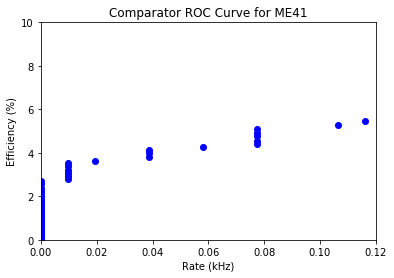

In [17]:
comp_efficiency=[0]
comp_sig_tot = len(comp_sig)
comp_rate=[0]
comp_bkg_tot = len(comp_bkg)
comp_limits=[0]

min_=0
max_=130
it_=1

for limit in tqdm(xrange(min_,max_,it_)):
    comp_efficiency.append(len(comp_sig[(comp_sig['Ev_max_nComp_ME41'] > limit)])/comp_sig_tot*100)
    
    comp_rate.append(len(comp_bkg[(comp_bkg['Ev_max_nComp_ME41'] > limit)])/comp_bkg_tot*30*1000)
    
    comp_limits.append(limit)
    
plt.plot(comp_rate,comp_efficiency,'bo')
plt.xlim(0,.12)
plt.ylim(0,10)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Comparator ROC Curve for ME41')

for i in range(len(comp_rate)):
    if comp_rate[i] > 0.02 and comp_rate[i] < 0.12:
        print 'rate =', comp_rate[i], 'kHz and efficiency =', comp_efficiency[i], '% for threshold >', comp_limits[i]

100%|██████████| 130/130 [00:00<00:00, 163.10it/s]


rate = 0.0773564964469 kHz and efficiency = 8.70817550505 % for threshold > 31
rate = 0.0676869343911 kHz and efficiency = 8.42803030303 % for threshold > 32
rate = 0.0580173723352 kHz and efficiency = 8.21890782828 % for threshold > 33
rate = 0.0580173723352 kHz and efficiency = 7.98216540404 % for threshold > 34
rate = 0.0483478102793 kHz and efficiency = 7.76909722222 % for threshold > 35


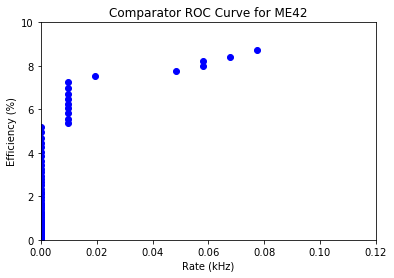

In [18]:
comp_efficiency=[0]
comp_sig_tot = len(comp_sig)
comp_rate=[0]
comp_bkg_tot = len(comp_bkg)
comp_limits=[0]

min_=0
max_=130
it_=1

for limit in tqdm(xrange(min_,max_,it_)):
    comp_efficiency.append(len(comp_sig[(comp_sig['Ev_max_nComp_ME42'] > limit)])/comp_sig_tot*100)
    
    comp_rate.append(len(comp_bkg[(comp_bkg['Ev_max_nComp_ME42'] > limit)])/comp_bkg_tot*30*1000)
    
    comp_limits.append(limit)
    
plt.plot(comp_rate,comp_efficiency,'bo')
plt.xlim(0,.12)
plt.ylim(0,10)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Comparator ROC Curve for ME42')

for i in range(len(comp_rate)):
    if comp_rate[i] > 0.02 and comp_rate[i] < 0.12:
        print 'rate =', comp_rate[i], 'kHz and efficiency =', comp_efficiency[i], '% for threshold >', comp_limits[i]

In [19]:
comp11, comp12, comp13 = 83, 62, 29
comp21, comp22 = 45, 40
comp31, comp32 = 43, 31
comp41, comp42 = 42, 31

efficiency_comp_final = len(comp_sig[(comp_sig['Ev_max_nComp_ME11'] > comp11) | (comp_sig['Ev_max_nComp_ME12'] > comp12) | (comp_sig['Ev_max_nComp_ME13'] > comp13) |
                           (comp_sig['Ev_max_nComp_ME21'] > comp21) | (comp_sig['Ev_max_nComp_ME22'] > comp22) |
                           (comp_sig['Ev_max_nComp_ME31'] > comp31) | (comp_sig['Ev_max_nComp_ME32'] > comp32) |
                           (comp_sig['Ev_max_nComp_ME41'] > comp41) | (comp_sig['Ev_max_nComp_ME41'] > comp42)])/comp_sig_tot*100
                
rate_comp_final       = len(comp_bkg[(comp_bkg['Ev_max_nComp_ME11'] > comp11) | (comp_bkg['Ev_max_nComp_ME12'] > comp12) | (comp_bkg['Ev_max_nComp_ME13'] > comp13) |
                           (comp_bkg['Ev_max_nComp_ME21'] > comp21) | (comp_bkg['Ev_max_nComp_ME22'] > comp22) |
                           (comp_bkg['Ev_max_nComp_ME31'] > comp31) | (comp_bkg['Ev_max_nComp_ME32'] > comp32) |
                           (comp_bkg['Ev_max_nComp_ME41'] > comp41) | (comp_bkg['Ev_max_nComp_ME42'] > comp42)])/comp_bkg_tot*30*1000

print "rate =", rate_comp_final, "kHz, efficiency =", efficiency_comp_final, "%"

rate = 0.715547592134 kHz, efficiency = 28.8746843434 %


# Wire

100%|██████████| 130/130 [00:02<00:00, 57.13it/s]


rate = 0.104577781468 kHz and efficiency = 0.165504196714 % for threshold > 92
rate = 0.0855636393829 kHz and efficiency = 0.153682468377 % for threshold > 93
rate = 0.0760565683403 kHz and efficiency = 0.145801316152 % for threshold > 94
rate = 0.0665494972978 kHz and efficiency = 0.137920163928 % for threshold > 95
rate = 0.0570424262552 kHz and efficiency = 0.126098435591 % for threshold > 96
rate = 0.0380282841702 kHz and efficiency = 0.122157859479 % for threshold > 97
rate = 0.0380282841702 kHz and efficiency = 0.118217283367 % for threshold > 98
rate = 0.0285212131276 kHz and efficiency = 0.114276707255 % for threshold > 99
rate = 0.0285212131276 kHz and efficiency = 0.110336131142 % for threshold > 100
rate = 0.0285212131276 kHz and efficiency = 0.102454978918 % for threshold > 101
rate = 0.0285212131276 kHz and efficiency = 0.0906332505812 % for threshold > 102
rate = 0.0285212131276 kHz and efficiency = 0.0827520983568 % for threshold > 103


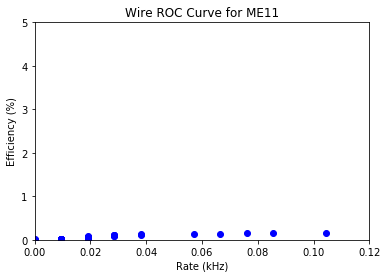

In [20]:
wire_efficiency=[0]
wire_sig_tot = len(wire_sig)
wire_rate=[0]
wire_bkg_tot = len(wire_bkg)
wire_limits=[0]

min_=0
max_=130
it_=1

for limit in tqdm(xrange(min_,max_,it_)):
    wire_efficiency.append(len(wire_sig[(wire_sig['Ev_max_nWire_ME11'] > limit)])/wire_sig_tot*100)
    
    wire_rate.append(len(wire_bkg[(wire_bkg['Ev_max_nWire_ME11'] > limit)])/wire_bkg_tot*30*1000)
    
    wire_limits.append(limit)
    
plt.plot(wire_rate,wire_efficiency,'bo')
plt.xlim(0,0.12)
plt.ylim(0,5)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Wire ROC Curve for ME11')

for i in range(len(wire_rate)):
    if wire_rate[i] > 0.02 and wire_rate[i] < 0.12:
        print 'rate =', wire_rate[i], 'kHz and efficiency =', wire_efficiency[i], '% for threshold >', wire_limits[i]

100%|██████████| 130/130 [00:00<00:00, 164.99it/s]


rate = 0.0950707104254 kHz and efficiency = 2.84903652914 % for threshold > 99
rate = 0.0950707104254 kHz and efficiency = 2.79386846357 % for threshold > 100
rate = 0.0855636393829 kHz and efficiency = 2.72293809355 % for threshold > 101
rate = 0.0855636393829 kHz and efficiency = 2.67959175631 % for threshold > 102
rate = 0.0855636393829 kHz and efficiency = 2.62048311463 % for threshold > 103
rate = 0.0855636393829 kHz and efficiency = 2.56531504906 % for threshold > 104
rate = 0.0760565683403 kHz and efficiency = 2.52984986405 % for threshold > 105
rate = 0.0760565683403 kHz and efficiency = 2.49044410293 % for threshold > 106
rate = 0.0760565683403 kHz and efficiency = 2.43527603736 % for threshold > 107
rate = 0.0760565683403 kHz and efficiency = 2.39981085235 % for threshold > 108
rate = 0.0760565683403 kHz and efficiency = 2.34464278678 % for threshold > 109
rate = 0.0760565683403 kHz and efficiency = 2.30917760177 % for threshold > 110
rate = 0.0760565683403 kHz and efficiency

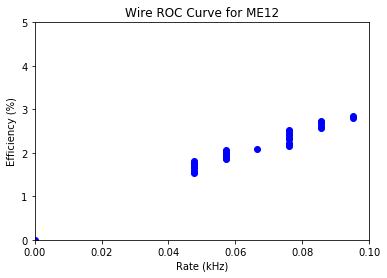

In [21]:
wire_efficiency=[0]
wire_sig_tot = len(wire_sig)
wire_rate=[0]
wire_bkg_tot = len(wire_bkg)
wire_limits=[0]

min_=0
max_=130
it_=1

for limit in tqdm(xrange(min_,max_,it_)):
    wire_efficiency.append(len(wire_sig[(wire_sig['Ev_max_nWire_ME12'] > limit)])/wire_sig_tot*100)
    
    wire_rate.append(len(wire_bkg[(wire_bkg['Ev_max_nWire_ME12'] > limit)])/wire_bkg_tot*30*1000)
    
    wire_limits.append(limit)
    
plt.plot(wire_rate,wire_efficiency,'bo')
plt.xlim(0,0.1)
plt.ylim(0,5)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Wire ROC Curve for ME12')

for i in range(len(wire_rate)):
    if wire_rate[i] > 0.02 and wire_rate[i] < 0.12:
        print 'rate =', wire_rate[i], 'kHz and efficiency =', wire_efficiency[i], '% for threshold >', wire_limits[i]

100%|██████████| 130/130 [00:00<00:00, 224.97it/s]


rate = 0.11408485251 kHz and efficiency = 2.89632344249 % for threshold > 36
rate = 0.104577781468 kHz and efficiency = 2.81357134413 % for threshold > 37
rate = 0.104577781468 kHz and efficiency = 2.69141348465 % for threshold > 38
rate = 0.0855636393829 kHz and efficiency = 2.56137447295 % for threshold > 39
rate = 0.0665494972978 kHz and efficiency = 2.44709776569 % for threshold > 40
rate = 0.0665494972978 kHz and efficiency = 2.36434566734 % for threshold > 41
rate = 0.0570424262552 kHz and efficiency = 2.2894747212 % for threshold > 42
rate = 0.0570424262552 kHz and efficiency = 2.18307916617 % for threshold > 43
rate = 0.0570424262552 kHz and efficiency = 2.09638649171 % for threshold > 44
rate = 0.0570424262552 kHz and efficiency = 2.00575324112 % for threshold > 45
rate = 0.0570424262552 kHz and efficiency = 1.92300114277 % for threshold > 46
rate = 0.0380282841702 kHz and efficiency = 1.84418962052 % for threshold > 47
rate = 0.0380282841702 kHz and efficiency = 1.78902155495

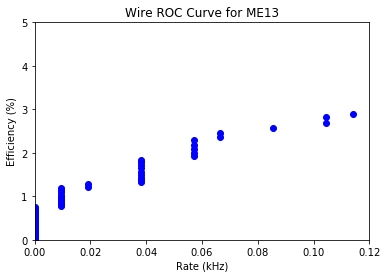

In [22]:
wire_efficiency=[0]
wire_sig_tot = len(wire_sig)
wire_rate=[0]
wire_bkg_tot = len(wire_bkg)
wire_limits=[0]

min_=0
max_=130
it_=1

for limit in tqdm(xrange(min_,max_,it_)):
    wire_efficiency.append(len(wire_sig[(wire_sig['Ev_max_nWire_ME13'] > limit)])/wire_sig_tot*100)
    
    wire_rate.append(len(wire_bkg[(wire_bkg['Ev_max_nWire_ME13'] > limit)])/wire_bkg_tot*30*1000)
    
    wire_limits.append(limit)
    
plt.plot(wire_rate,wire_efficiency,'bo')
plt.xlim(0,0.12)
plt.ylim(0,5)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Wire ROC Curve for ME13')

for i in range(len(wire_rate)):
    if wire_rate[i] > 0.02 and wire_rate[i] < 0.12:
        print 'rate =', wire_rate[i], 'kHz and efficiency =', wire_efficiency[i], '% for threshold >', wire_limits[i]

100%|██████████| 130/130 [00:01<00:00, 74.46it/s]


rate = 0.11408485251 kHz and efficiency = 1.95452575166 % for threshold > 128
rate = 0.0855636393829 kHz and efficiency = 1.94270402333 % for threshold > 129


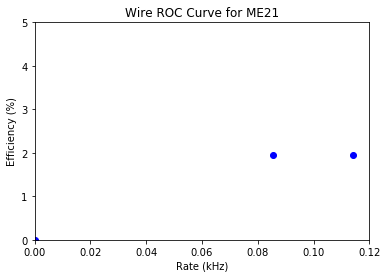

In [23]:
wire_efficiency=[0]
wire_sig_tot = len(wire_sig)
wire_rate=[0]
wire_bkg_tot = len(wire_bkg)
wire_limits=[0]

min_=0
max_=130
it_=1

for limit in tqdm(xrange(min_,max_,it_)):
    wire_efficiency.append(len(wire_sig[(wire_sig['Ev_max_nWire_ME21'] > limit)])/wire_sig_tot*100)
    
    wire_rate.append(len(wire_bkg[(wire_bkg['Ev_max_nWire_ME21'] > limit)])/wire_bkg_tot*30*1000)
    
    wire_limits.append(limit)
    
plt.plot(wire_rate,wire_efficiency,'bo')
plt.xlim(0,0.12)
plt.ylim(0,5)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Wire ROC Curve for ME21')

for i in range(len(wire_rate)):
    if wire_rate[i] > 0 and wire_rate[i] < 0.12:
        print 'rate =', wire_rate[i], 'kHz and efficiency =', wire_efficiency[i], '% for threshold >', wire_limits[i]

100%|██████████| 130/130 [00:00<00:00, 165.02it/s]


rate = 0.11408485251 kHz and efficiency = 1.66686369547 % for threshold > 79
rate = 0.11408485251 kHz and efficiency = 1.58805217323 % for threshold > 80
rate = 0.0855636393829 kHz and efficiency = 1.52500295543 % for threshold > 81
rate = 0.0570424262552 kHz and efficiency = 1.46983488986 % for threshold > 82
rate = 0.0380282841702 kHz and efficiency = 1.42254797651 % for threshold > 83
rate = 0.0380282841702 kHz and efficiency = 1.35555818261 % for threshold > 84
rate = 0.0380282841702 kHz and efficiency = 1.30039011704 % for threshold > 85
rate = 0.0380282841702 kHz and efficiency = 1.24916262758 % for threshold > 86
rate = 0.0380282841702 kHz and efficiency = 1.19005398589 % for threshold > 87
rate = 0.0380282841702 kHz and efficiency = 1.13882649643 % for threshold > 88
rate = 0.0380282841702 kHz and efficiency = 1.07577727864 % for threshold > 89
rate = 0.0285212131276 kHz and efficiency = 0.996965756394 % for threshold > 90


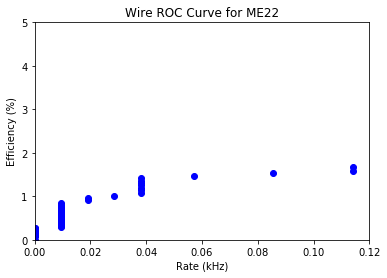

In [24]:
wire_efficiency=[0]
wire_sig_tot = len(wire_sig)
wire_rate=[0]
wire_bkg_tot = len(wire_bkg)
wire_limits=[0]

min_=0
max_=130
it_=1

for limit in tqdm(xrange(min_,max_,it_)):
    wire_efficiency.append(len(wire_sig[(wire_sig['Ev_max_nWire_ME22'] > limit)])/wire_sig_tot*100)
    
    wire_rate.append(len(wire_bkg[(wire_bkg['Ev_max_nWire_ME22'] > limit)])/wire_bkg_tot*30*1000)
    
    wire_limits.append(limit)
    
plt.plot(wire_rate,wire_efficiency,'bo')
plt.xlim(0,0.12)
plt.ylim(0,5)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Wire ROC Curve for ME22')

for i in range(len(wire_rate)):
    if wire_rate[i] > 0.02 and wire_rate[i] < 0.12:
        print 'rate =', wire_rate[i], 'kHz and efficiency =', wire_efficiency[i], '% for threshold >', wire_limits[i]

100%|██████████| 130/130 [00:01<00:00, 99.22it/s]


rate = 0.11408485251 kHz and efficiency = 1.98605036056 % for threshold > 114
rate = 0.0950707104254 kHz and efficiency = 1.94270402333 % for threshold > 115
rate = 0.0855636393829 kHz and efficiency = 1.87177365331 % for threshold > 116
rate = 0.0665494972978 kHz and efficiency = 1.84024904441 % for threshold > 117
rate = 0.0665494972978 kHz and efficiency = 1.79296213106 % for threshold > 118
rate = 0.0570424262552 kHz and efficiency = 1.7732592505 % for threshold > 119
rate = 0.0570424262552 kHz and efficiency = 1.74567521772 % for threshold > 120
rate = 0.0570424262552 kHz and efficiency = 1.71415060882 % for threshold > 121
rate = 0.0475353552127 kHz and efficiency = 1.67868542381 % for threshold > 122
rate = 0.0475353552127 kHz and efficiency = 1.63533908657 % for threshold > 123
rate = 0.0475353552127 kHz and efficiency = 1.57623044489 % for threshold > 124
rate = 0.0475353552127 kHz and efficiency = 1.54864641211 % for threshold > 125
rate = 0.0380282841702 kHz and efficiency =

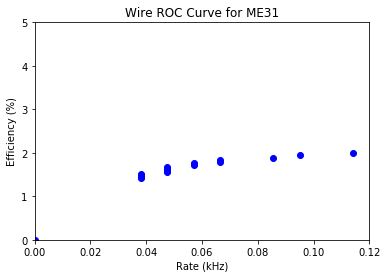

In [25]:
wire_efficiency=[0]
wire_sig_tot = len(wire_sig)
wire_rate=[0]
wire_bkg_tot = len(wire_bkg)
wire_limits=[0]

min_=0
max_=130
it_=1

for limit in tqdm(xrange(min_,max_,it_)):
    wire_efficiency.append(len(wire_sig[(wire_sig['Ev_max_nWire_ME31'] > limit)])/wire_sig_tot*100)
    
    wire_rate.append(len(wire_bkg[(wire_bkg['Ev_max_nWire_ME31'] > limit)])/wire_bkg_tot*30*1000)
    
    wire_limits.append(limit)
    
plt.plot(wire_rate,wire_efficiency,'bo')
plt.xlim(0,0.12)
plt.ylim(0,5)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Wire ROC Curve for ME31')

for i in range(len(wire_rate)):
    if wire_rate[i] > 0.02 and wire_rate[i] < 0.12:
        print 'rate =', wire_rate[i], 'kHz and efficiency =', wire_efficiency[i], '% for threshold >', wire_limits[i]

100%|██████████| 130/130 [00:00<00:00, 166.91it/s]


rate = 0.11408485251 kHz and efficiency = 0.977262875832 % for threshold > 76
rate = 0.104577781468 kHz and efficiency = 0.941797690822 % for threshold > 77
rate = 0.0855636393829 kHz and efficiency = 0.894510777476 % for threshold > 78
rate = 0.0570424262552 kHz and efficiency = 0.839342711904 % for threshold > 79
rate = 0.0570424262552 kHz and efficiency = 0.807818103007 % for threshold > 80
rate = 0.0570424262552 kHz and efficiency = 0.776293494109 % for threshold > 81
rate = 0.0570424262552 kHz and efficiency = 0.701422547977 % for threshold > 82
rate = 0.0570424262552 kHz and efficiency = 0.642313906293 % for threshold > 83
rate = 0.0570424262552 kHz and efficiency = 0.61867044962 % for threshold > 84
rate = 0.0475353552127 kHz and efficiency = 0.587145840722 % for threshold > 85
rate = 0.0285212131276 kHz and efficiency = 0.535918351263 % for threshold > 86
rate = 0.0285212131276 kHz and efficiency = 0.516215470702 % for threshold > 87
rate = 0.0285212131276 kHz and efficiency = 

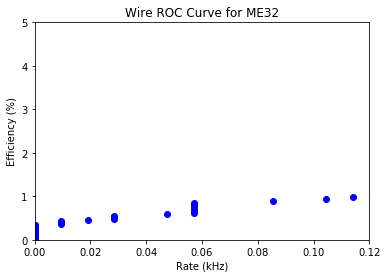

In [26]:
wire_efficiency=[0]
wire_sig_tot = len(wire_sig)
wire_rate=[0]
wire_bkg_tot = len(wire_bkg)
wire_limits=[0]

min_=0
max_=130
it_=1

for limit in tqdm(xrange(min_,max_,it_)):
    wire_efficiency.append(len(wire_sig[(wire_sig['Ev_max_nWire_ME32'] > limit)])/wire_sig_tot*100)
    
    wire_rate.append(len(wire_bkg[(wire_bkg['Ev_max_nWire_ME32'] > limit)])/wire_bkg_tot*30*1000)
    
    wire_limits.append(limit)
    
plt.plot(wire_rate,wire_efficiency,'bo')
plt.xlim(0,0.12)
plt.ylim(0,5)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Wire ROC Curve for ME32')

for i in range(len(wire_rate)):
    if wire_rate[i] > 0.02 and wire_rate[i] < 0.12:
        print 'rate =', wire_rate[i], 'kHz and efficiency =', wire_efficiency[i], '% for threshold >', wire_limits[i]

100%|██████████| 130/130 [00:01<00:00, 103.63it/s]


rate = 0.104577781468 kHz and efficiency = 3.52681562044 % for threshold > 118
rate = 0.0950707104254 kHz and efficiency = 3.49135043543 % for threshold > 119
rate = 0.0760565683403 kHz and efficiency = 3.4480040982 % for threshold > 120
rate = 0.0570424262552 kHz and efficiency = 3.41253891319 % for threshold > 121
rate = 0.0570424262552 kHz and efficiency = 3.35737084762 % for threshold > 122
rate = 0.0475353552127 kHz and efficiency = 3.29826220593 % for threshold > 123
rate = 0.0380282841702 kHz and efficiency = 3.2549158687 % for threshold > 124
rate = 0.0380282841702 kHz and efficiency = 3.1918666509 % for threshold > 125
rate = 0.0380282841702 kHz and efficiency = 3.13275800922 % for threshold > 126
rate = 0.0285212131276 kHz and efficiency = 3.08547109587 % for threshold > 127
rate = 0.0285212131276 kHz and efficiency = 3.04606533475 % for threshold > 128


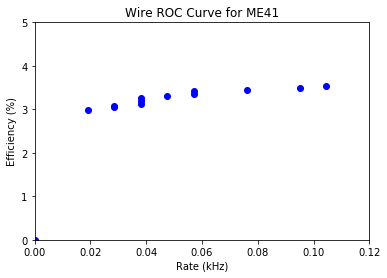

In [27]:
wire_efficiency=[0]
wire_sig_tot = len(wire_sig)
wire_rate=[0]
wire_bkg_tot = len(wire_bkg)
wire_limits=[0]

min_=0
max_=130
it_=1

for limit in tqdm(xrange(min_,max_,it_)):
    wire_efficiency.append(len(wire_sig[(wire_sig['Ev_max_nWire_ME41'] > limit)])/wire_sig_tot*100)
    
    wire_rate.append(len(wire_bkg[(wire_bkg['Ev_max_nWire_ME41'] > limit)])/wire_bkg_tot*30*1000)
    
    wire_limits.append(limit)
    
plt.plot(wire_rate,wire_efficiency,'bo')
plt.xlim(0,0.12)
plt.ylim(0,5)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Wire ROC Curve for ME41')

for i in range(len(wire_rate)):
    if wire_rate[i] > 0.02 and wire_rate[i] < 0.12:
        print 'rate =', wire_rate[i], 'kHz and efficiency =', wire_efficiency[i], '% for threshold >', wire_limits[i]

100%|██████████| 130/130 [00:00<00:00, 134.93it/s]


rate = 0.11408485251 kHz and efficiency = 1.0324309414 % for threshold > 87
rate = 0.0760565683403 kHz and efficiency = 0.985144028057 % for threshold > 88
rate = 0.0760565683403 kHz and efficiency = 0.929975962486 % for threshold > 89
rate = 0.0665494972978 kHz and efficiency = 0.86692674469 % for threshold > 90
rate = 0.0570424262552 kHz and efficiency = 0.807818103007 % for threshold > 91
rate = 0.0570424262552 kHz and efficiency = 0.756590613548 % for threshold > 92
rate = 0.0475353552127 kHz and efficiency = 0.697481971864 % for threshold > 93
rate = 0.0475353552127 kHz and efficiency = 0.65413563463 % for threshold > 94
rate = 0.0475353552127 kHz and efficiency = 0.61867044962 % for threshold > 95
rate = 0.0475353552127 kHz and efficiency = 0.571383536273 % for threshold > 96
rate = 0.0380282841702 kHz and efficiency = 0.539858927375 % for threshold > 97
rate = 0.0380282841702 kHz and efficiency = 0.500453166253 % for threshold > 98


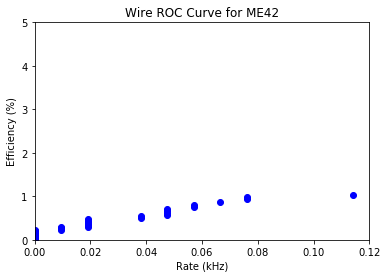

In [28]:
wire_efficiency=[0]
wire_sig_tot = len(wire_sig)
wire_rate=[0]
wire_bkg_tot = len(wire_bkg)
wire_limits=[0]

min_=0
max_=130
it_=1

for limit in tqdm(xrange(min_,max_,it_)):
    wire_efficiency.append(len(wire_sig[(wire_sig['Ev_max_nWire_ME42'] > limit)])/wire_sig_tot*100)
    
    wire_rate.append(len(wire_bkg[(wire_bkg['Ev_max_nWire_ME42'] > limit)])/wire_bkg_tot*30*1000)
    
    wire_limits.append(limit)
    
plt.plot(wire_rate,wire_efficiency,'bo')
plt.xlim(0,0.12)
plt.ylim(0,5)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Wire ROC Curve for ME42')

for i in range(len(wire_rate)):
    if wire_rate[i] > 0.02 and wire_rate[i] < 0.12:
        print 'rate =', wire_rate[i], 'kHz and efficiency =', wire_efficiency[i], '% for threshold >', wire_limits[i]

In [29]:
wire11, wire12, wire13 = 94, 101, 40
wire21, wire22 = 128, 83
wire31, wire32 = 117, 79
wire41, wire42 = 121, 90

efficiency_wire_final = len(wire_sig[(wire_sig['Ev_max_nWire_ME11'] > wire11) | (wire_sig['Ev_max_nWire_ME12'] > wire12) | (wire_sig['Ev_max_nWire_ME13'] > wire13) |
                                     (wire_sig['Ev_max_nWire_ME21'] > wire21) | (wire_sig['Ev_max_nWire_ME22'] > wire22) |
                                     (wire_sig['Ev_max_nWire_ME31'] > wire31) | (wire_sig['Ev_max_nWire_ME32'] > wire32) |
                                     (wire_sig['Ev_max_nWire_ME41'] > wire41) | (wire_sig['Ev_max_nWire_ME42'] > wire42)])/wire_sig_tot*100
                
rate_wire_final       = len(wire_bkg[(wire_bkg['Ev_max_nWire_ME11'] > wire11) | (wire_bkg['Ev_max_nWire_ME12'] > wire12) | (wire_bkg['Ev_max_nWire_ME13'] > wire13) |
                           (wire_bkg['Ev_max_nWire_ME21'] > wire21) | (wire_bkg['Ev_max_nWire_ME22'] > wire22) |
                           (wire_bkg['Ev_max_nWire_ME31'] > wire31) | (wire_bkg['Ev_max_nWire_ME32'] > wire32) |
                           (wire_bkg['Ev_max_nWire_ME41'] > wire41) | (wire_bkg['Ev_max_nWire_ME42'] > wire42)])/wire_bkg_tot*30*1000

print "rate =", rate_wire_final, "kHz, efficiency =", efficiency_wire_final, "%"

rate = 0.627466688808 kHz, efficiency = 14.9111400087 %


# Results

In [30]:
print "Optimal Comparator Thresholds:"
print "ME11: %i, ME12: %i, ME13: %i," %(comp11,comp12,comp13)
print "ME21: %i, ME22: %i," %(comp21,comp22)
print "ME31: %i, ME32: %i," %(comp31,comp32)
print "ME41: %i, ME42: %i," %(comp41,comp42)
print "With rate and efficiency:"
print "rate = %f kHz, efficiency = %f%%" %(rate_comp_final,efficiency_comp_final)
print
print "Optimal Wire Thresholds:"
print "ME11: %i, ME12: %i, ME13: %i," %(wire11,wire12,wire13)
print "ME21: %i, ME22: %i," %(wire21,wire22)
print "ME31: %i, ME32: %i," %(wire31,wire32)
print "ME41: %i, ME42: %i," %(wire41,wire42)
print "With rate and efficiency:"
print "rate = %f kHz, efficiency = %f%%" %(rate_wire_final,efficiency_wire_final)

Optimal Comparator Thresholds:
ME11: 83, ME12: 62, ME13: 29,
ME21: 45, ME22: 40,
ME31: 43, ME32: 31,
ME41: 42, ME42: 31,
With rate and efficiency:
rate = 0.715548 kHz, efficiency = 28.874684%

Optimal Wire Thresholds:
ME11: 94, ME12: 101, ME13: 40,
ME21: 128, ME22: 83,
ME31: 117, ME32: 79,
ME41: 121, ME42: 90,
With rate and efficiency:
rate = 0.627467 kHz, efficiency = 14.911140%
